## Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv").drop(['id', 'CustomerId', 'Surname'], axis=1)
test = pd.read_csv("test.csv").drop(['id', 'CustomerId', 'Surname'], axis=1)

In [3]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Dataset bilan tanishib chiqamiz

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [5]:
train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
def func_1(df):
    df['HasCrCard'] = df['HasCrCard'].astype(bool)
    df['IsActiveMember'] = df['IsActiveMember'].astype(bool)
    df = df.assign(Gender=lambda x: (x['Gender'] == 'Male'))
    return df

In [7]:
train = func_1(train)
test = func_1(test)
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,True,33.0,3,0.00,2,True,False,181449.97,0
1,627,France,True,33.0,1,0.00,2,True,True,49503.50,0
2,678,France,True,40.0,10,0.00,2,True,False,184866.69,0
3,581,France,True,34.0,2,148882.54,1,True,True,84560.88,0
4,716,Spain,True,33.0,5,0.00,2,True,True,15068.83,0


## WoE

In [8]:
def WoE(data, feature_name):
    df = data.copy()
    
    woe_table = df.groupby(feature_name)['Exited'].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [9]:
def print_WoE(df_woe, col, rotation=45):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    sns.pointplot(data=df_woe, x=col, y='WoE', color='red', linewidth=2, ax=ax1)
    ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
    ax1.tick_params(axis='y', colors='red')
    ax1.set_xlabel(f'{col} Categories')

    ax1.grid(visible=True, which='major', linestyle='--')

    sns.barplot(data=df_woe, x=col, y='Percent of Observations', alpha=0.3, ax=ax2)
    ax2.set_ylabel('Rate of Observations')
    ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)
    ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)

    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation)

    plt.title("WoE change plot")
    plt.show()

## Balance

In [10]:
train['Balance_Cat'] = pd.cut(train['Balance'], bins=[-np.inf, 0, np.inf])
df_woe = WoE(train, 'Balance_Cat')
df_woe

Exited,Balance_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-inf, 0.0]",75156,14492,0.414994,0.577621,-0.330654,89648,54.321
1,"(0.0, inf]",54957,20429,0.585006,0.422379,0.325719,75386,45.679


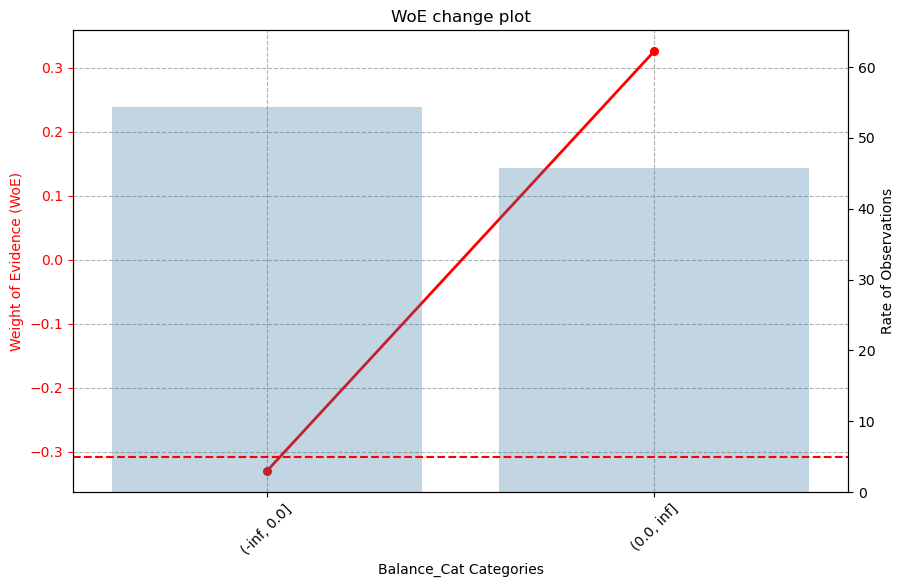

In [11]:
print_WoE(df_woe, 'Balance_Cat')

In [12]:
train = train.assign(Balance_Cat=lambda x: (x['Balance'] > 0).astype(bool))
test = test.assign(Balance_Cat=lambda x: (x['Balance'] > 0).astype(bool))

## Geography

In [13]:
df_woe = WoE(train, 'Geography')
df_woe

Exited,Geography,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,France,78643,15572,0.445921,0.604421,-0.304129,94215,57.088
1,Germany,21492,13114,0.375533,0.165179,0.821315,34606,20.969
2,Spain,29978,6235,0.178546,0.230400,-0.254970,36213,21.943


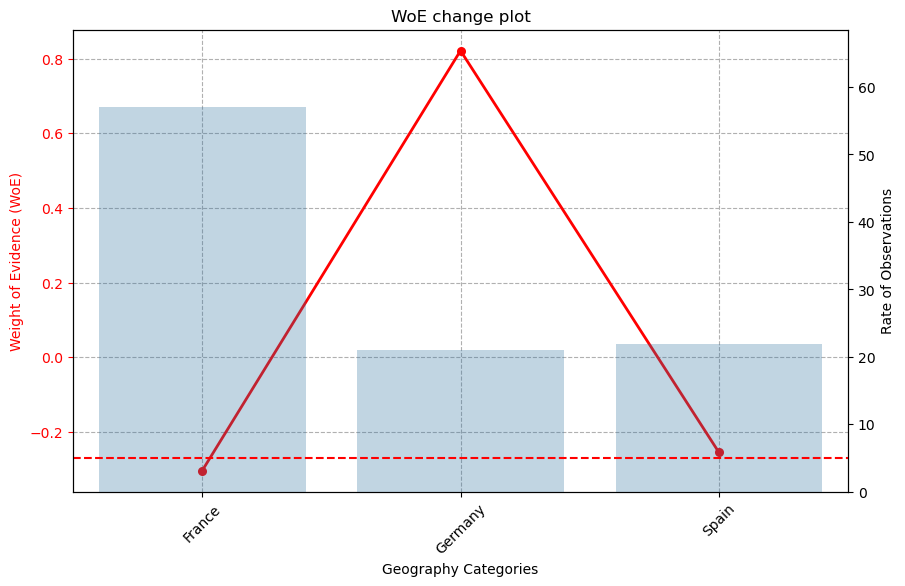

In [14]:
print_WoE(df_woe, 'Geography')

In [15]:
train = train.assign(Geography_Cat=lambda x: (x['Geography'] == 'Germany').astype(int))
test = test.assign(Geography_Cat=lambda x: (x['Geography'] == 'Germany').astype(int))

## Age

In [16]:
train['Age_Cat'] = pd.cut(train['Age'], bins=[0, 31, 33, 35, 37, 39, 41, 44, np.inf])
df_woe = WoE(train, 'Age_Cat')
df_woe

Exited,Age_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(0.0, 31.0]",32977,2985,0.085479,0.253449,-1.086896,35962,21.791
1,"(31.0, 33.0]",14662,1418,0.040606,0.112687,-1.020697,16080,9.743
2,"(33.0, 35.0]",16016,1727,0.049454,0.123093,-0.911887,17743,10.751
3,"(35.0, 37.0]",15741,2071,0.059305,0.120979,-0.712922,17812,10.793
4,"(37.0, 39.0]",14626,2564,0.073423,0.112410,-0.425917,17190,10.416
5,"(39.0, 41.0]",11325,3078,0.088142,0.087040,0.012582,14403,8.727
6,"(41.0, 44.0]",9655,4513,0.129235,0.074205,0.554801,14168,8.585
7,"(44.0, inf]",15111,16565,0.474356,0.116138,1.407184,31676,19.194


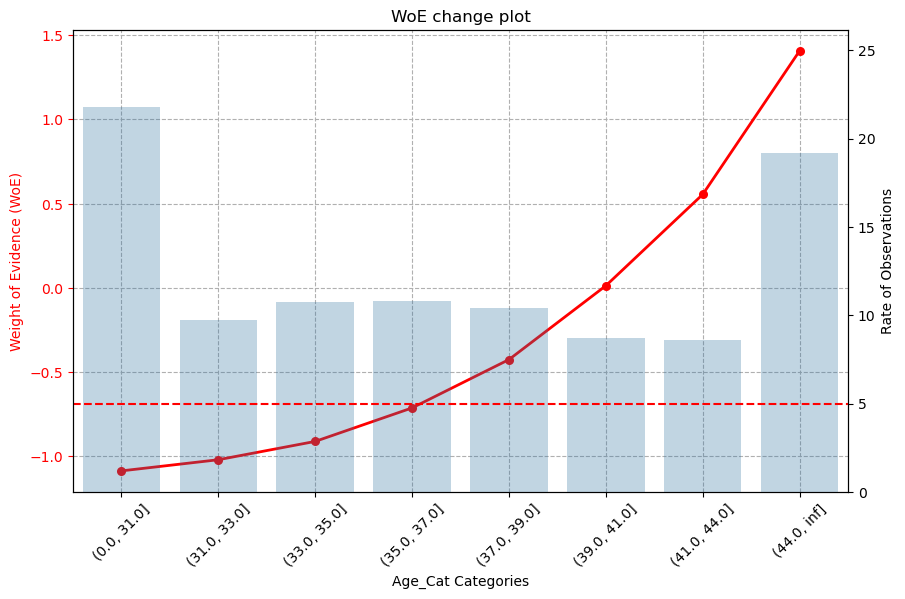

In [17]:
print_WoE(df_woe, 'Age_Cat')

In [18]:
train['Age_Cat'] = train['Age_Cat'].cat.codes + 1

test['Age_Cat'] = pd.cut(test['Age'], bins=[0, 31, 33, 35, 37, 39, 41, 44, np.inf])
test['Age_Cat'] = test['Age_Cat'].cat.codes + 1

## Tenure

In [19]:
train['Tenure_Cat'] = pd.cut(train['Tenure'], bins=[-np.inf, 5, 6, 7])
# train['Tenure_Cat'] = pd.cut(train['Tenure'], bins=10)
df_woe = WoE(train, 'Tenure_Cat')
df_woe

Exited,Tenure_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-inf, 5.0]",71098,20166,0.756641,0.723688,0.044529,91264,73.072
1,"(5.0, 6.0]",12677,3145,0.118002,0.129036,-0.089385,15822,12.668
2,"(6.0, 7.0]",14469,3341,0.125356,0.147276,-0.161148,17810,14.260


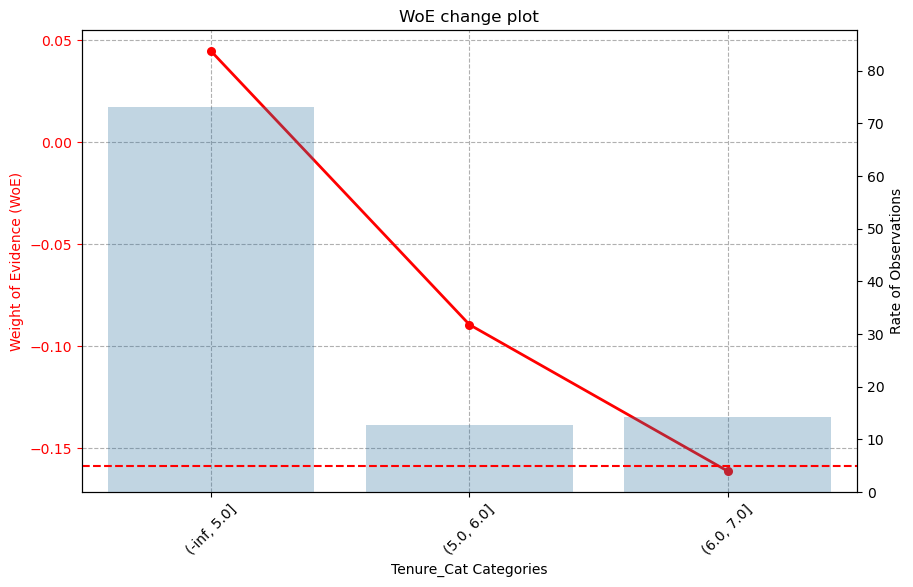

In [20]:
print_WoE(df_woe, 'Tenure_Cat')

In [21]:
train['Tenure_Cat'] = train['Tenure_Cat'].cat.codes + 1

test['Tenure_Cat'] = pd.cut(test['Tenure'], bins=[-np.inf, 5, 6, 7])
test['Tenure_Cat'] = test['Tenure_Cat'].cat.codes + 1

## CreditScore

In [22]:
train['CreditScore_Cat'] = pd.cut(train['CreditScore'], bins=[-np.inf, 550, 650, np.inf])
# train['CreditScore_Cat'] = pd.cut(train['CreditScore'], bins=10)
df_woe = WoE(train, 'CreditScore_Cat')
df_woe

Exited,CreditScore_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-inf, 550.0]",11891,3787,0.108445,0.091390,0.171107,15678,9.500
1,"(550.0, 650.0]",46515,13356,0.382463,0.357497,0.067506,59871,36.278
2,"(650.0, inf]",71707,17778,0.509092,0.551113,-0.079312,89485,54.222


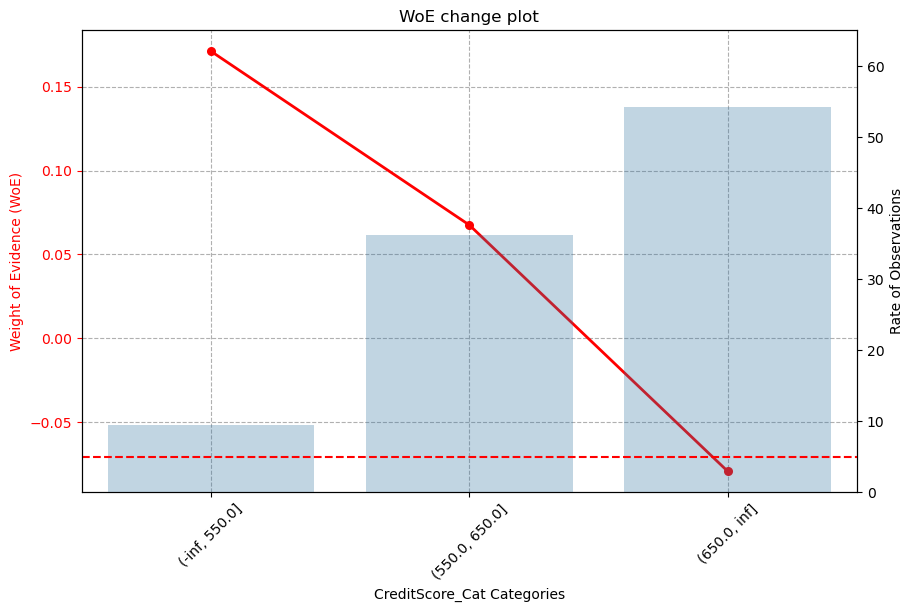

In [23]:
print_WoE(df_woe, 'CreditScore_Cat')

In [24]:
train['CreditScore_Cat'] = train['CreditScore_Cat'].cat.codes + 1

test['CreditScore_Cat'] = pd.cut(test['CreditScore'], bins=[-np.inf, 550, 650, np.inf])
test['CreditScore_Cat'] = test['CreditScore_Cat'].cat.codes + 1

## EstimatedSalary

In [25]:
train['EstimatedSalary_Cat'] = pd.cut(train['EstimatedSalary'], bins=[-np.inf, 50_000, 140_000, np.inf])
# train['EstimatedSalary_Cat'] = pd.cut(train['EstimatedSalary'], bins=3)
df_woe = WoE(train, 'EstimatedSalary_Cat')
df_woe

Exited,EstimatedSalary_Cat,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(-inf, 50000.0]",15989,3955,0.113256,0.122885,-0.081605,19944,12.085
1,"(50000.0, 140000.0]",68694,17976,0.514762,0.527956,-0.025309,86670,52.516
2,"(140000.0, inf]",45430,12990,0.371982,0.349158,0.063322,58420,35.399


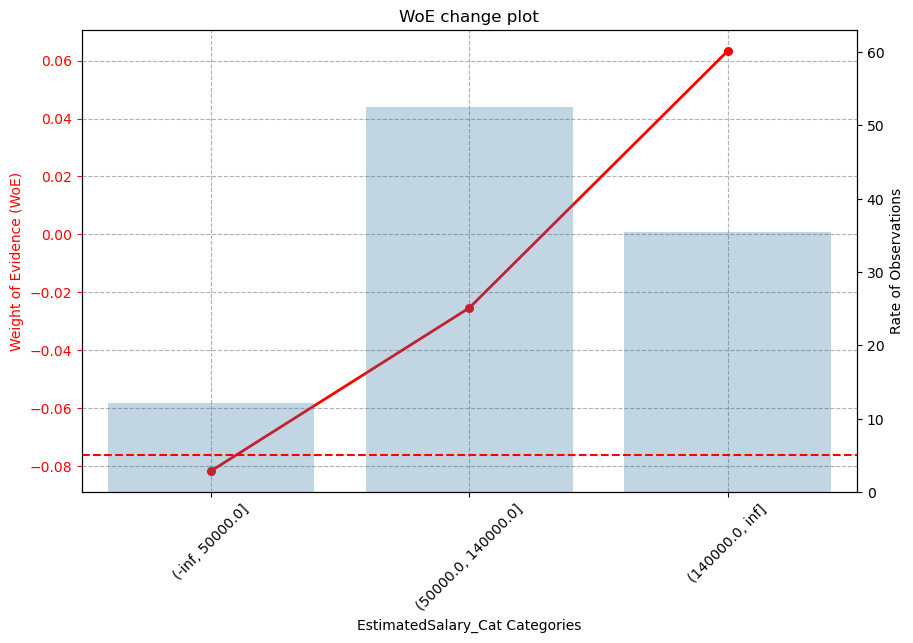

In [26]:
print_WoE(df_woe, 'EstimatedSalary_Cat')

In [27]:
train['EstimatedSalary_Cat'] = train['EstimatedSalary_Cat'].cat.codes + 1

test['EstimatedSalary_Cat'] = pd.cut(test['EstimatedSalary'], bins=[-np.inf, 50_000, 140_000, np.inf])
test['EstimatedSalary_Cat'] = test['EstimatedSalary_Cat'].cat.codes + 1

## ML model

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

In [29]:
columns = [
    'Tenure_Cat',
    'CreditScore_Cat',
    'Gender',
    'Age_Cat',
    'Age',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary_Cat',
    'Balance',
    'Balance_Cat',
    'Geography_Cat'
]

X = train[columns]
y = train["Exited"]

In [30]:
# ridge = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=3)),
#     ('ridge', RidgeClassifier(alpha=0.5))
# ])

# logistic = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('logistic', LogisticRegression(max_iter=25))
# ])

# model = StackingClassifier(
#     estimators=[
#         ('ridge', ridge),
#         ('logistic', logistic)
#     ],
#     final_estimator=LogisticRegression(max_iter=25),
#     cv=10,
#     n_jobs=-1
# )

In [31]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('logistic', LogisticRegression(max_iter=500, C=0.01))
])

In [32]:
model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]

roc_auc = roc_auc_score(y, y_pred_proba)
print(f'ROC AUC: {roc_auc:.5f}')

ROC AUC: 0.88976


## Submission

In [33]:
y_pred_final = model.predict_proba(test[columns])[:, 1]

sub = pd.read_csv('sample_submission.csv')
sub['Exited'] = y_pred_final
sub.to_csv('sample_submission.csv', index=False)
sub.head()

,id,Exited
0,165034,0.024424
1,165035,0.869293
2,165036,0.027081
3,165037,0.227271
4,165038,0.360419
